# Evaluating a model fit with chi-square

In [1]:
"""
Evaluating a model fit with chi-square
--------------------------------------
Figure 4.1.

The use of the :math:`\chi^2` statistic for evaluating the goodness of fit.
The data here are a series of observations of the luminosity of a star, with
known error bars. Our model assumes that the brightness of the star does not
vary; that is, all the scatter in the data is due to measurement error.
:math:`\chi^2_{\rm dof} \approx 1` indicates that the model fits the data
well (upper-left panel). :math:`\chi^2_{\rm dof}` much smaller than 1
(upper-right panel) is an indication that the errors are overestimated.
:math:`\chi^2_{\rm dof}` much larger than 1 is an indication either that the
errors are underestimated (lower-left panel) or that the model is not a good
description of the data (lower-right panel). In this last case, it is clear
from the data that the star's luminosity is varying with time: this situation
is be treated more fully in chapter 10.
"""

"\nEvaluating a model fit with chi-square\n--------------------------------------\nFigure 4.1.\n\nThe use of the :math:`\\chi^2` statistic for evaluating the goodness of fit.\nThe data here are a series of observations of the luminosity of a star, with\nknown error bars. Our model assumes that the brightness of the star does not\nvary; that is, all the scatter in the data is due to measurement error.\n:math:`\\chi^2_{\rm dof} \x07pprox 1` indicates that the model fits the data\nwell (upper-left panel). :math:`\\chi^2_{\rm dof}` much smaller than 1\n(upper-right panel) is an indication that the errors are overestimated.\n:math:`\\chi^2_{\rm dof}` much larger than 1 is an indication either that the\nerrors are underestimated (lower-left panel) or that the model is not a good\ndescription of the data (lower-right panel). In this last case, it is clear\nfrom the data that the star's luminosity is varying with time: this situation\nis be treated more fully in chapter 10.\n"

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [4]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

In [7]:
#------------------------------------------------------------
# Generate Dataset
np.random.seed(1)

N = 50
L0 = 10
dL = 0.2

t = np.linspace(0, 1, N)
L_obs = np.random.normal(L0, dL, N)


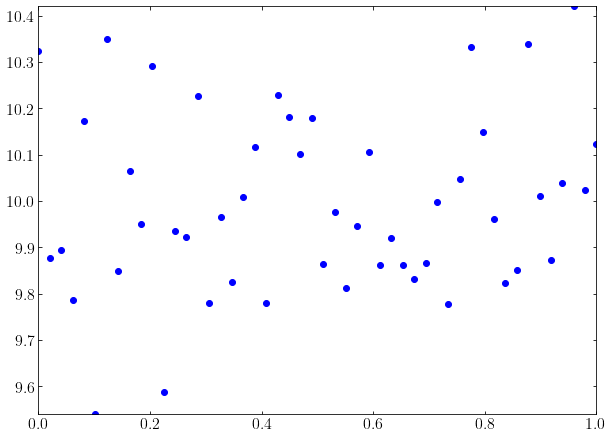

In [8]:
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111)
ax.plot(t,L_obs,"ob")

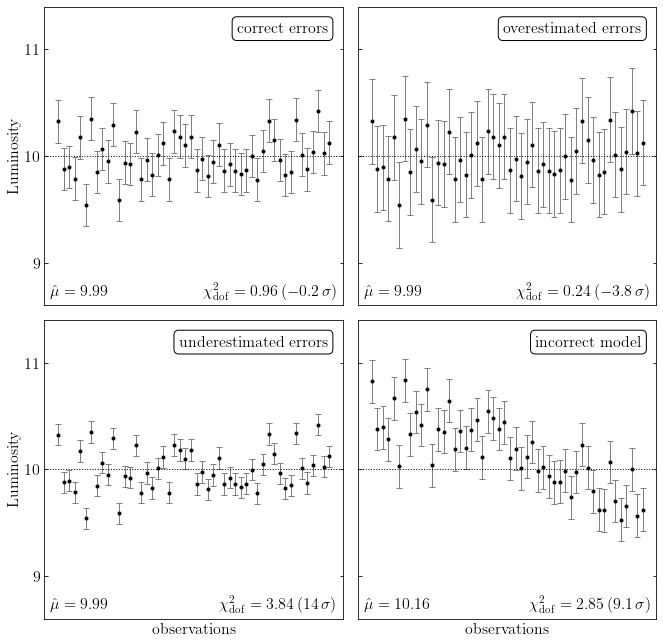

In [9]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure()
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.05,bottom=0.1, top=0.95, hspace=0.05)

y_vals = [L_obs, L_obs, L_obs, L_obs + 0.5 - t ** 2]
y_errs = [dL, dL * 2, dL / 2, dL]
titles = ['correct errors',
          'overestimated errors',
          'underestimated errors',
          'incorrect model']

for i in range(4):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[])

    # compute the mean and the chi^2/dof
    mu = np.mean(y_vals[i])
    z = (y_vals[i] - mu) / y_errs[i]
    chi2 = np.sum(z ** 2)
    chi2dof = chi2 / (N - 1)

    # compute the standard deviations of chi^2/dof
    sigma = np.sqrt(2. / (N - 1))
    nsig = (chi2dof - 1) / sigma

    # plot the points with errorbars
    ax.errorbar(t, y_vals[i], y_errs[i], fmt='.k', ecolor='gray', lw=1)
    ax.plot([-0.1, 1.3], [L0, L0], ':k', lw=1)

    # Add labels and text
    ax.text(0.95, 0.95, titles[i], ha='right', va='top',
            transform=ax.transAxes,
            bbox=dict(boxstyle='round', fc='w', ec='k'))
    ax.text(0.02, 0.02, r'$\hat{\mu} = %.2f$' % mu, ha='left', va='bottom',
            transform=ax.transAxes)
    ax.text(0.98, 0.02,
            r'$\chi^2_{\rm dof} = %.2f\, (%.2g\,\sigma)$' % (chi2dof, nsig),
            ha='right', va='bottom', transform=ax.transAxes)

    # set axis limits
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(8.6, 11.4)

    # set ticks and labels
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))

    if i > 1:
        ax.set_xlabel('observations')

    if i % 2 == 0:
        ax.set_ylabel('Luminosity')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

plt.show()
